# Lab | Data Cleaning and Formatting

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv


# Challenge 1: Data Cleaning and Formatting

## Exercise 1: Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. Start by taking a first look at the dataframe and identifying any column names that need to be modified. Use appropriate naming conventions and make sure that column names are descriptive and informative.

*Hint*:
- *Column names should be in lower case*
- *White spaces in column names should be replaced by `_`*
- *`st` could be replaced for `state`*

In [127]:
import pandas as pd


url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv'
df = pd.read_csv(url)


print("Current Column Names:")
print(df.columns)


df.rename(columns={
    'old_column_name_1': 'descriptive_column_name_1',
    'old_column_name_2': 'descriptive_column_name_2',
    'old_column_name_3': 'descriptive_column_name_3',
    
}, inplace=True)


print("\nUpdated Column Names:")
print(df.columns)


Current Column Names:
Index(['Customer', 'ST', 'GENDER', 'Education', 'Customer Lifetime Value',
       'Income', 'Monthly Premium Auto', 'Number of Open Complaints',
       'Policy Type', 'Vehicle Class', 'Total Claim Amount'],
      dtype='object')

Updated Column Names:
Index(['Customer', 'ST', 'GENDER', 'Education', 'Customer Lifetime Value',
       'Income', 'Monthly Premium Auto', 'Number of Open Complaints',
       'Policy Type', 'Vehicle Class', 'Total Claim Amount'],
      dtype='object')


## Exercise 2: Cleaning invalid Values

The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they only contain valid data.

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

*Hint*:
- *Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
- *State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
- *In education, "Bachelors" could be replaced by "Bachelor"*
- *In Customer Lifetime Value, delete the `%` character*
- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*

In [118]:
import pandas as pd


url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv'
df = pd.read_csv(url)


df['GENDER'] = df['GENDER'].replace({'Femal': 'F', 'Male': 'M', 'female': 'F'})


state_mapping = {'AZ': 'Arizona', 'Cali': 'California', 'WA': 'Washington'}
df['ST'] = df['ST'].replace(state_mapping)


df['Education'] = df['Education'].replace({'Bachelors': 'Bachelor'})


df['Customer Lifetime Value'] = df['Customer Lifetime Value'].str.rstrip('%').astype('float') / 100.0


vehicle_mapping = {'Sports Car': 'Luxury', 'Luxury SUV': 'Luxury', 'Luxury Car': 'Luxury'}
df['Vehicle Class'] = df['Vehicle Class'].replace(vehicle_mapping)


print(df.head())


  Customer          ST GENDER             Education  Customer Lifetime Value  \
0  RB50392  Washington    NaN                Master                      NaN   
1  QZ44356     Arizona      F              Bachelor                6979.5359   
2  AI49188      Nevada      F              Bachelor               12887.4317   
3  WW63253  California      M              Bachelor                7645.8618   
4  GA49547  Washington      M  High School or Below                5363.0765   

    Income  Monthly Premium Auto Number of Open Complaints     Policy Type  \
0      0.0                1000.0                    1/0/00   Personal Auto   
1      0.0                  94.0                    1/0/00   Personal Auto   
2  48767.0                 108.0                    1/0/00   Personal Auto   
3      0.0                 106.0                    1/0/00  Corporate Auto   
4  36357.0                  68.0                    1/0/00   Personal Auto   

   Vehicle Class  Total Claim Amount  
0  Four-Doo

## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate.

It is important to note that this exercise does not involve handling null values (NaN or None).

*Hint*:
- *Customer lifetime value should be numeric*
- *Number of open complaints has an incorrect format. Look at the different values it takes with `unique()` and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use `split()` to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.*

In [119]:

import pandas as pd


url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv'
df = pd.read_csv(url)
print("Before Conversion:")
print(df.dtypes)



Before Conversion:
Customer                      object
ST                            object
GENDER                        object
Education                     object
Customer Lifetime Value       object
Income                       float64
Monthly Premium Auto         float64
Number of Open Complaints     object
Policy Type                   object
Vehicle Class                 object
Total Claim Amount           float64
dtype: object


In [120]:
df['Customer Lifetime Value']  #pd.to_numeric(df['Customer Lifetime Value'], errors='coerce')
df['Customer Lifetime Value']



0               NaN
1        697953.59%
2       1288743.17%
3        764586.18%
4        536307.65%
           ...     
4003            NaN
4004            NaN
4005            NaN
4006            NaN
4007            NaN
Name: Customer Lifetime Value, Length: 4008, dtype: object

In [121]:
# Assuming df is your DataFrame
# Replace NaN values with a specific value, let's say 0
df.replace([pd.np.nan, pd.np.inf, -pd.np.inf], 0, inplace=True)

# Alternatively, you can replace NaN values in a specific column with a specific value
# For example, replace NaN values in the 'column_name' column with 0
df[['GENDER','Customer Lifetime Value']].fillna(0, inplace=True)


/var/folders/7x/tgss3gfn6_71hn8dvqz48z4c0000gn/T/ipykernel_1272/3177883915.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df.replace([pd.np.nan, pd.np.inf, -pd.np.inf], 0, inplace=True)
/var/folders/7x/tgss3gfn6_71hn8dvqz48z4c0000gn/T/ipykernel_1272/3177883915.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['GENDER','Customer Lifetime Value']].fillna(0, inplace=True)


## Exercise 4: Dealing with Null values

Identify any columns with null or missing values. Identify how many null values each column has. You can use the `isnull()` function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (note: we haven't covered this yet)

Implement your chosen strategy to handle the null values. You can use the `fillna()` function in pandas to fill null values or `dropna()` function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the `isnull()` function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values.

After formatting data types, as a last step, convert all the numeric variables to integers.

In [122]:
import pandas as pd


url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv'
df = pd.read_csv(url)


print("Columns with Null Values:")
print(df.isnull().sum())
numeric_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='object').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])
df[numeric_cols] = df[numeric_cols].astype(int)
print("\nColumns with Null Values after Handling:")
print(df.isnull().sum())

print("\nSample of the Modified DataFrame:")
print(df.head())


Columns with Null Values:
Customer                     2937
ST                           2937
GENDER                       3054
Education                    2937
Customer Lifetime Value      2940
Income                       2937
Monthly Premium Auto         2937
Number of Open Complaints    2937
Policy Type                  2937
Vehicle Class                2937
Total Claim Amount           2937
dtype: int64

Columns with Null Values after Handling:
Customer                     0
ST                           0
GENDER                       0
Education                    0
Customer Lifetime Value      0
Income                       0
Monthly Premium Auto         0
Number of Open Complaints    0
Policy Type                  0
Vehicle Class                0
Total Claim Amount           0
dtype: int64

Sample of the Modified DataFrame:
  Customer          ST GENDER             Education Customer Lifetime Value  \
0  RB50392  Washington      F                Master              251459.20%  

## Exercise 5: Dealing with duplicates

Use the `.duplicated()` method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the `drop_duplicates()` function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using `.duplicated()`.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

*Hint*: *after dropping duplicates, reset the index to ensure consistency*.

In [123]:
import pandas as pd


url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv'
df = pd.read_csv(url)
print("Number of Duplicate Rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("\nNumber of Duplicate Rows after Handling:", df.duplicated().sum())
df.reset_index(drop=True, inplace=True)
print("\nSample of the Modified DataFrame:")
print(df.head())
df.to_csv('cleaned_data.csv', index=False)
print("\nCleaned dataset saved to 'cleaned_data.csv'")


Number of Duplicate Rows: 2936

Number of Duplicate Rows after Handling: 0

Sample of the Modified DataFrame:
  Customer          ST GENDER             Education Customer Lifetime Value  \
0  RB50392  Washington    NaN                Master                     NaN   
1  QZ44356     Arizona      F              Bachelor              697953.59%   
2  AI49188      Nevada      F              Bachelor             1288743.17%   
3  WW63253  California      M              Bachelor              764586.18%   
4  GA49547  Washington      M  High School or Below              536307.65%   

    Income  Monthly Premium Auto Number of Open Complaints     Policy Type  \
0      0.0                1000.0                    1/0/00   Personal Auto   
1      0.0                  94.0                    1/0/00   Personal Auto   
2  48767.0                 108.0                    1/0/00   Personal Auto   
3      0.0                 106.0                    1/0/00  Corporate Auto   
4  36357.0               

# Bonus: Challenge 2: creating functions on a separate `py` file

Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting.

Write these functions in separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain.

*Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.*

In [124]:


import pandas as pd

def load_data(url):
    
   
    Standardize column names of the dataframe.

    Parameters:
    - df (pd.DataFrame): Input dataframe.
    - column_mapping (dict): Mapping of old column names to new column names.

    Returns:
    - pd.DataFrame: Dataframe with standardized column names.
  
    Handle null values in the dataframe.

    Parameters:
    - df (pd.DataFrame): Input dataframe.
    - numeric_strategy (str): Strategy for filling null values in numeric columns.
    - categorical_strategy (str): Strategy for filling null values in categorical columns.

    Returns:
    - pd.DataFrame: Dataframe with null values handled.
  
    df.drop_duplicates(inplace=True, keep=strategy)
    df.reset_index(drop=True, inplace=True)
    return df

def convert_to_integers(df):
   
   
   
  


SyntaxError: invalid syntax (1096638116.py, line 6)

# Bonus: Challenge 3: Analyzing Clean and Formated Data

You have been tasked with analyzing the data to identify potential areas for improving customer retention and profitability. Your goal is to identify customers with a high policy claim amount and a low customer lifetime value.

In the Pandas Lab, we only looked at high policy claim amounts because we couldn't look into low customer lifetime values. If we had tried to work with that column, we wouldn't have been able to because customer lifetime value wasn't clean and in its proper format. So after cleaning and formatting the data, let's get some more interesting insights!

Instructions:

- Review the statistics again for total claim amount and customer lifetime value to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount and a low customer lifetime value. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount, and clients with a low customer lifetime value to be those in the bottom 25% of the customer lifetime value. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile and a customer lifetime value in the bottom 25th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount and low customer lifetime value data. To do so, select both columns of the dataframe simultaneously and pass it to the `.describe()` method. This will give you descriptive statistics, such as mean, median, standard deviation, minimum and maximum values for both columns at the same time, allowing you to compare and analyze their characteristics.

In [128]:
import pandas as pd

# Replace 'url' with the actual URL or the local path to the CSV file
url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv'
df = pd.read_csv(url)

# Display DataFrame information
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer                   1071 non-null   object 
 1   ST                         1071 non-null   object 
 2   GENDER                     954 non-null    object 
 3   Education                  1071 non-null   object 
 4   Customer Lifetime Value    1068 non-null   object 
 5   Income                     1071 non-null   float64
 6   Monthly Premium Auto       1071 non-null   float64
 7   Number of Open Complaints  1071 non-null   object 
 8   Policy Type                1071 non-null   object 
 9   Vehicle Class              1071 non-null   object 
 10  Total Claim Amount         1071 non-null   float64
dtypes: float64(3), object(8)
memory usage: 344.6+ KB
None


In [130]:
import pandas as pd


data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 35],
        'City': ['New York', 'San Francisco', 'Los Angeles']}

df = pd.DataFrame(data)


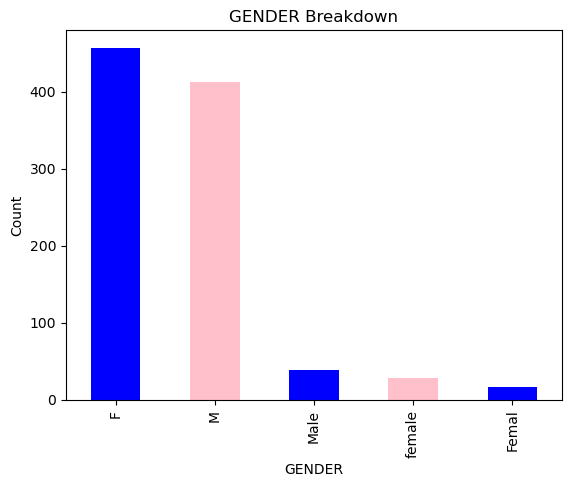

In [131]:
import pandas as pd
import matplotlib.pyplot as plt


url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv'
df = pd.read_csv(url)
gender_counts = df['GENDER'].value_counts()
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('GENDER Breakdown')
plt.xlabel('GENDER')
plt.ylabel('Count')
plt.show()


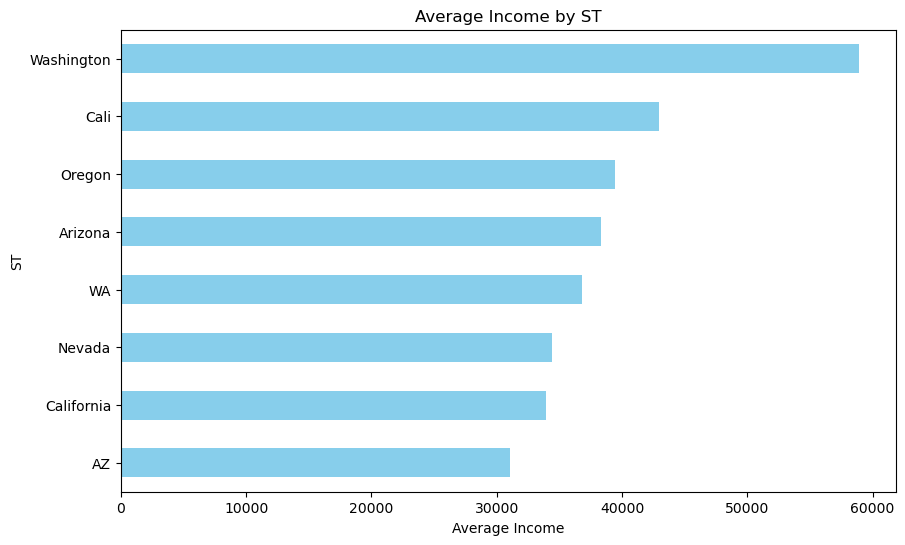

In [132]:
import pandas as pd
import matplotlib.pyplot as plt


url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv'
df = pd.read_csv(url)
income_by_state = df.groupby('ST')['Income'].mean()
income_by_state = income_by_state.sort_values()

plt.figure(figsize=(10, 6))
income_by_state.plot(kind='barh', color='skyblue')
plt.title('Average Income by ST')
plt.xlabel('Average Income')
plt.ylabel('ST')
plt.show()


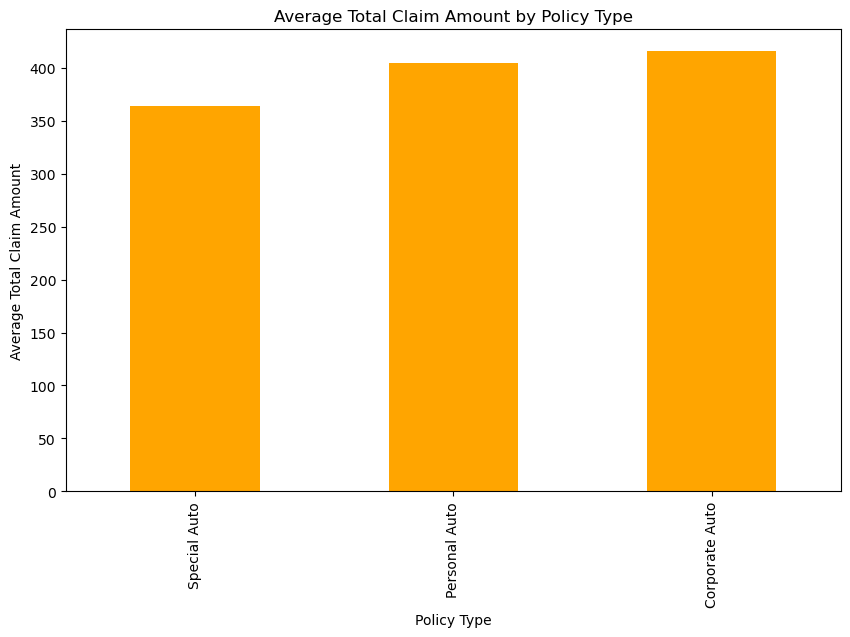

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'url' with the actual URL or the local path to the CSV file
url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv'
df = pd.read_csv(url)

# Assuming the DataFrame has columns 'Policy Type' and 'Total Claim Amount'
# You may need to adjust the column names based on your actual dataset
policy_type_claim_amount = df.groupby('Policy Type')['Total Claim Amount'].mean()

# Sorting the data for better visualization
policy_type_claim_amount = policy_type_claim_amount.sort_values()

# Plotting Policy Type by Total Claim Amount
plt.figure(figsize=(10, 6))
policy_type_claim_amount.plot(kind='bar', color='orange')
plt.title('Average Total Claim Amount by Policy Type')
plt.xlabel('Policy Type')
plt.ylabel('Average Total Claim Amount')
plt.show()


  Customer          ST GENDER             Education Customer Lifetime Value  \
0  RB50392  Washington    NaN                Master                     NaN   
1  QZ44356     Arizona      F              Bachelor              697953.59%   
2  AI49188      Nevada      F              Bachelor             1288743.17%   
3  WW63253  California      M              Bachelor              764586.18%   
4  GA49547  Washington      M  High School or Below              536307.65%   

    Income  Monthly Premium Auto Number of Open Complaints     Policy Type  \
0      0.0                1000.0                    1/0/00   Personal Auto   
1      0.0                  94.0                    1/0/00   Personal Auto   
2  48767.0                 108.0                    1/0/00   Personal Auto   
3      0.0                 106.0                    1/0/00  Corporate Auto   
4  36357.0                  68.0                    1/0/00   Personal Auto   

   Vehicle Class  Total Claim Amount  
0  Four-Door Car 

<Figure size 1200x600 with 0 Axes>

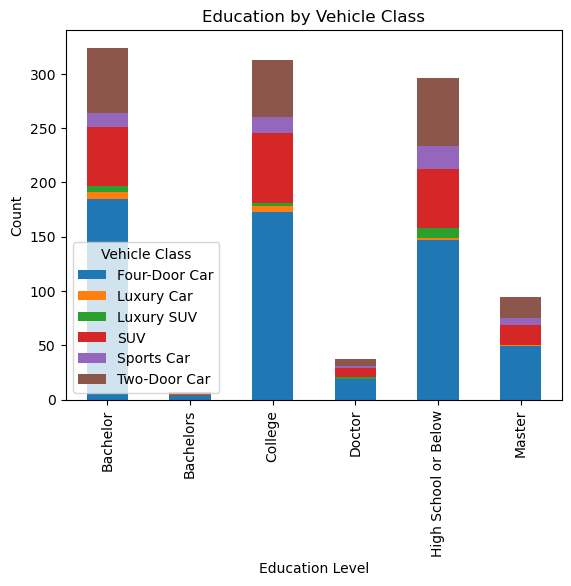

In [134]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv"
df = pd.read_csv(url)


print(df.head())

plt.figure(figsize=(12, 6))
df.groupby(['Education', 'Vehicle Class']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Education by Vehicle Class')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


In [ ]:
Education Level Distribution.

In [ ]:
Box Plots,Histograms,Scatter Plots,Pcatter Plots,Heatmap,Violin Plots,Pair Plots.


In [ ]:
round 2 

In [135]:

import pandas as pd
import numpy as np

# Load the CSV file into a DataFrame
url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv'
df = pd.read_csv(url)

# Get the data types of the columns
column_data_types = df.dtypes

# Separate numeric and categorical columns
numerical = df.select_dtypes(include=np.number)
categorical = df.select_dtypes(include=object)

# Display the data types and the first few rows of the numeric and categorical dataframes
print("Data Types:")
print(column_data_types)

print("\nNumeric DataFrame:")
print(numerical.head())

print("\nCategorical DataFrame:")
print(categorical.head())


Data Types:
Customer                      object
ST                            object
GENDER                        object
Education                     object
Customer Lifetime Value       object
Income                       float64
Monthly Premium Auto         float64
Number of Open Complaints     object
Policy Type                   object
Vehicle Class                 object
Total Claim Amount           float64
dtype: object

Numeric DataFrame:
    Income  Monthly Premium Auto  Total Claim Amount
0      0.0                1000.0            2.704934
1      0.0                  94.0         1131.464935
2  48767.0                 108.0          566.472247
3      0.0                 106.0          529.881344
4  36357.0                  68.0           17.269323

Categorical DataFrame:
  Customer          ST GENDER             Education Customer Lifetime Value  \
0  RB50392  Washington    NaN                Master                     NaN   
1  QZ44356     Arizona      F              Bach

In [ ]:
round 3

NameError: name 'sns' is not defined

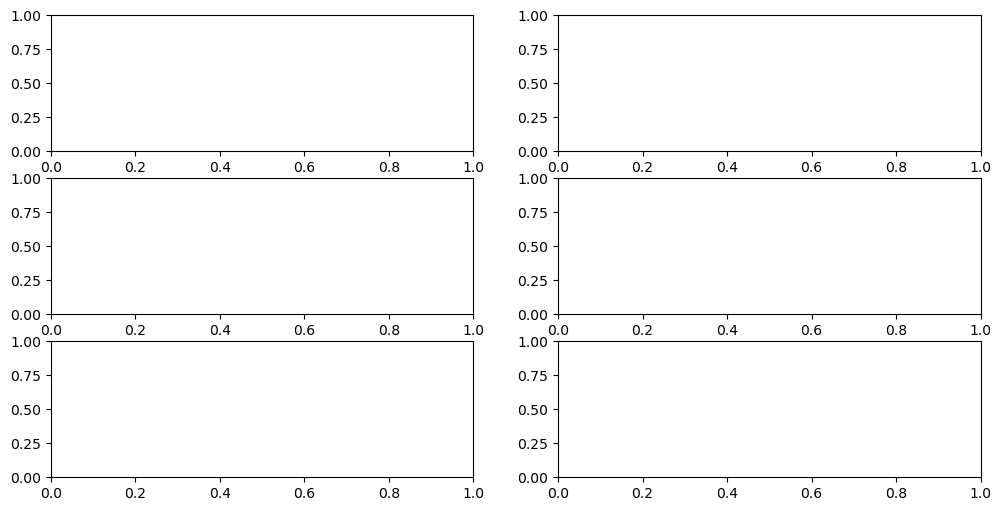

In [136]:

url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv'
df = pd.read_csv(url)


numerical = df.select_dtypes(include=np.number)

fig, axes = plt.subplots(nrows=len(numerical.columns), ncols=2, figsize=(12, 2 * len(numerical.columns)))

for i, col in enumerate(numerical.columns):

    sns.histplot(df[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {col}')

    
    axes[i, 1].hist(df[col], bins=30, color='skyblue', edgecolor='black')
    axes[i, 1].set_title(f'Histogram of {col}')


plt.tight_layout()
plt.show()

In [ ]:
round 4

In [ ]:

url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv'
df = pd.read_csv(url)


numerical = df.select_dtypes(include=np.number)

correlation_matrix = numerical.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
round 5

In [ ]:


url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv'
df = pd.read_csv(url)


numerical = df.select_dtypes(include=np.number)

correlation_matrix = numerical.corr()

high_corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)


numerical_no_high_corr = numerical.drop(columns=high_corr_features)

print("Correlation Matrix after dropping features with high correlation:")
print(correlation_matrix)


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

print("\nNumerical DataFrame after dropping features with high correlation:")
print(numerical_no_high_corr.head())


In [125]:

from sklearn.preprocessing import MinMaxScaler

# Load your data
url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv'
data = pd.read_csv(url)



In [126]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
df.columns= pd.read_csv(url)





ValueError: Length mismatch: Expected axis has 11 elements, new values have 4008 elements

In [ ]:
target_column = 'Total Claim Amount'  



In [ ]:

X = data.drop(target_column, axis=1) 
y = data[target_column]  


In [ ]:
print("Features (X):")
display(X.head())

print("\nTarget variable (y):")
display(y.head())